In [26]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

#dropout rate
keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

### Conv layer 1

In [9]:
#32개 필터 사용
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
#print(L1) #shape=(?, 28, 28, 32)
L1 = tf.nn.relu(L1)
#print(L1) #shape=(?, 28, 28, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#print(L1) #shape=(?, 14, 14, 32)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
#print(L1) #shape=(?, 14, 14, 32)


Tensor("Conv2D_3:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu_3:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 14, 14, 32), dtype=float32)


### Conv layer 2

In [13]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
#print(L2) #shape=(?, 14, 14, 64)
L2 = tf.nn.relu(L2)
#print(L2) #shape=(?, 14, 14, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#print(L2) #shape=(?, 7, 7, 64)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
#print(L2) #shape=(?, 7, 7, 64)

Tensor("Conv2D_7:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_7:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_7:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_7/mul:0", shape=(?, 7, 7, 64), dtype=float32)


### FC(Fully Connected) layer 1

In [14]:
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128*4*4])

### Final FC layer

In [15]:
W4 = tf.get_variable("W4", shape=[128*4*4, 625],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [16]:
W5 = tf.get_variable("W5", shape=[625, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

In [19]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch:  0001 cost =  0.465079199
Epoch:  0002 cost =  0.089887623
Epoch:  0003 cost =  0.065933095
Epoch:  0004 cost =  0.053503707
Epoch:  0005 cost =  0.049286312
Epoch:  0006 cost =  0.043236367
Epoch:  0007 cost =  0.038988581
Epoch:  0008 cost =  0.034783542
Epoch:  0009 cost =  0.034928359
Epoch:  0010 cost =  0.030698844
Epoch:  0011 cost =  0.029538121
Epoch:  0012 cost =  0.027125532
Epoch:  0013 cost =  0.027583106
Epoch:  0014 cost =  0.025174285
Epoch:  0015 cost =  0.023193498
Learning Finished!


In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Accuracy:  0.9947


- Accuracy:  0.9947

Label:  [4]
Prediction:  [4]


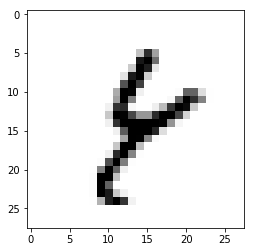

In [28]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()